# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/UB/Sem 1/DIC/Project 1/jatinjay_sboreddy_lkotla_phase_1/water_potability_processed.csv'

In [ ]:
import pandas as pd

data = pd.read_csv(file_path)

In [ ]:
data.head(5)

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.519144,0.551219,0.464652,0.523249,0.762536,0.804335,0.279439,0.748575,0.258967,0
1,2,0.660854,0.675358,0.444637,0.777833,0.497718,0.481211,0.640827,0.493987,0.281003,0
2,3,0.695127,0.612070,0.492506,0.621069,0.673735,0.358484,0.728149,0.913805,0.654492,0
3,4,0.817239,0.398569,0.400816,0.426140,0.316780,0.436423,0.345074,0.067976,0.523011,0
4,5,0.264806,0.444846,0.645275,0.554776,0.443088,0.174862,0.169162,0.351635,0.163169,0


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.519144,0.551219,0.464652,0.523249,0.762536,0.804335,0.279439,0.748575,0.258967,0
1,0.660854,0.675358,0.444637,0.777833,0.497718,0.481211,0.640827,0.493987,0.281003,0
2,0.695127,0.612070,0.492506,0.621069,0.673735,0.358484,0.728149,0.913805,0.654492,0
3,0.817239,0.398569,0.400816,0.426140,0.316780,0.436423,0.345074,0.067976,0.523011,0
4,0.264806,0.444846,0.645275,0.554776,0.443088,0.174862,0.169162,0.351635,0.163169,0


In [ ]:
data.shape

(2646, 10)

In [ ]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models

Imports

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.metrics import accuracy_score, log_loss, precision_recall_fscore_support, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Logistic Regression

In [79]:
lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test.values, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy*100}%")

Logistic Regression Accuracy: 64.86146095717883%


In [80]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best Score: 0.6144707510745248
Test Set Score: 0.6486146095717884


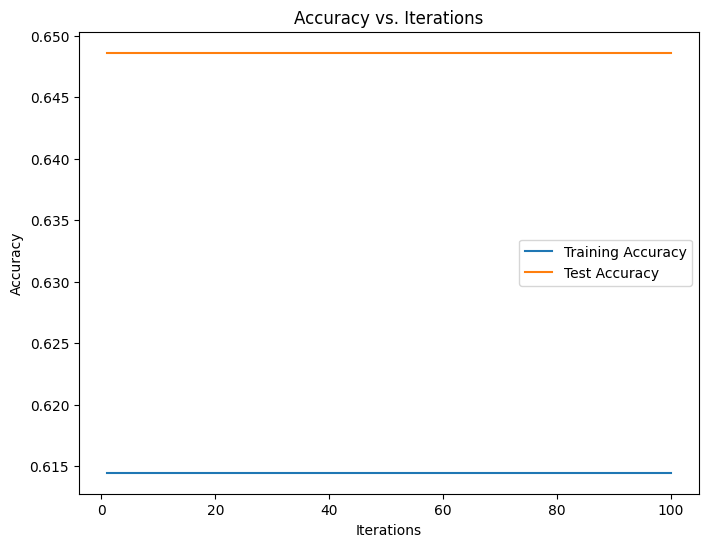

In [81]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
train_accuracy = []
test_accuracy = []

num_epochs = 100

for i in range(1, num_epochs + 1):
    lr_model.fit(X_train, y_train)
    train_accuracy.append(lr_model.score(X_train, y_train))
    test_accuracy.append(lr_model.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, num_epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(np.arange(1, num_epochs + 1), test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test.values, lr_pred)

print("Precision:", precision)
print("Recall:", recall)
print("fscore", fscore)
print("Support", support)

Precision: [0.64861461 0.        ]
Recall: [1. 0.]
fscore [0.7868602 0.       ]
Support [515 279]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
cm = confusion_matrix(y_test.values, lr_pred)
cm

array([[515,   0],
       [279,   0]])

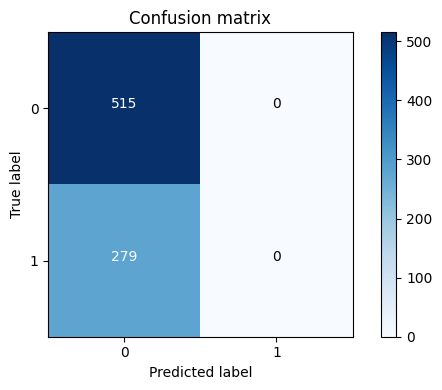

In [84]:
target = np.unique(y_test)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(len(target))
plt.xticks(ticks, target)
plt.yticks(ticks, target)

threshold = cm.max() / 2.
for i, j in ((i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## Decision Tree Classification

In [ ]:
# Decision Tree Classification
decision_tree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 3)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)
dt_probab = decision_tree.predict_proba(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy*100}%")

Decision Tree Accuracy: 58.816120906801004%


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test.values, dt_pred)

print("Precision:", precision)
print("Recall:", recall)
print("fscore", fscore)

Precision: [0.68875502 0.41891892]
Recall: [0.66601942 0.44444444]
fscore [0.67719645 0.43130435]


In [ ]:
support

array([515, 279])

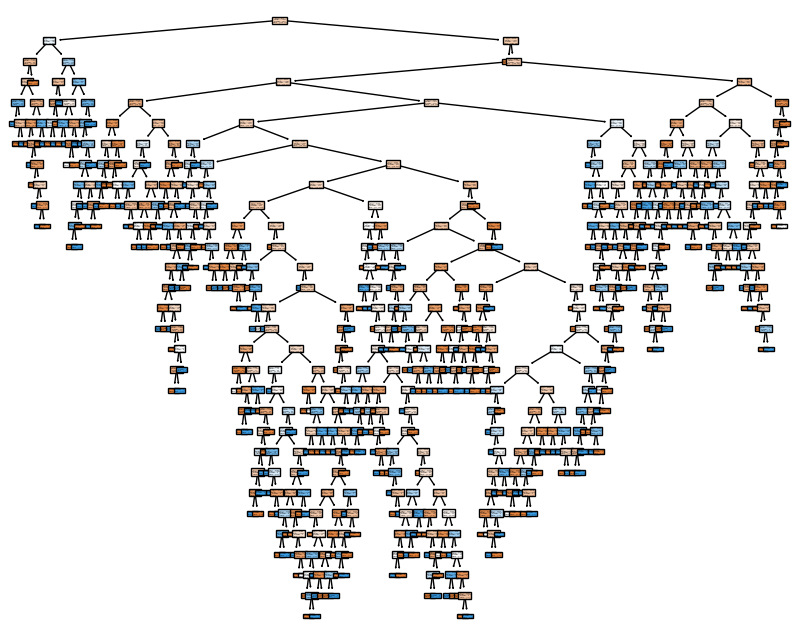

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True)
plt.show()

In [ ]:
cm = confusion_matrix(y_test.values, dt_pred)
cm

array([[343, 172],
       [155, 124]])

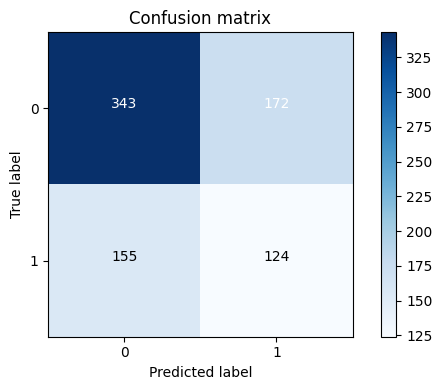

In [ ]:
target = np.unique(y_test)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(len(target))
plt.xticks(ticks, target)
plt.yticks(ticks, target)

threshold = cm.max() / 2.
for i, j in ((i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## Catboost Classification

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0)
cb_model.fit(X_train, y_train)

cb_pred = cb_model.predict(X_test)
cb_accuracy = accuracy_score(y_test, cb_pred)

print(f"CatBoost Accuracy: {cb_accuracy * 100} %")

CatBoost Accuracy: 66.62468513853904 %


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test.values, cb_pred)

print("Precision:", precision)
print("Recall:", recall)
print("fscore", fscore)
print("Support", support)

Precision: [0.71331058 0.53365385]
Recall: [0.81165049 0.39784946]
fscore [0.75930972 0.45585216]
Support [515 279]


In [ ]:
cm = confusion_matrix(y_test.values, cb_pred)
cm

array([[418,  97],
       [168, 111]])

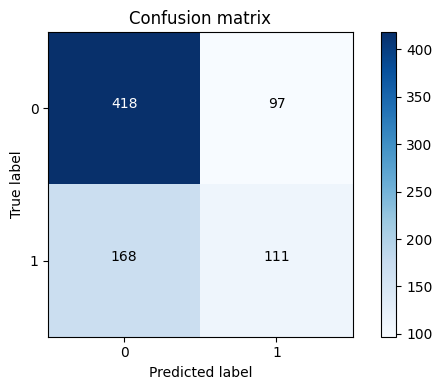

In [ ]:
target = np.unique(y_test)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(len(target))
plt.xticks(ticks, target)
plt.yticks(ticks, target)

threshold = cm.max() / 2.
for i, j in ((i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy", accuracy*100, "%")

KNN Accuracy 64.35768261964736 %


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test.values, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("fscore", fscore)

Precision: [0.7027972  0.49099099]
Recall: [0.78058252 0.390681  ]
fscore [0.73965041 0.43512974]


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[402 113]
 [170 109]]


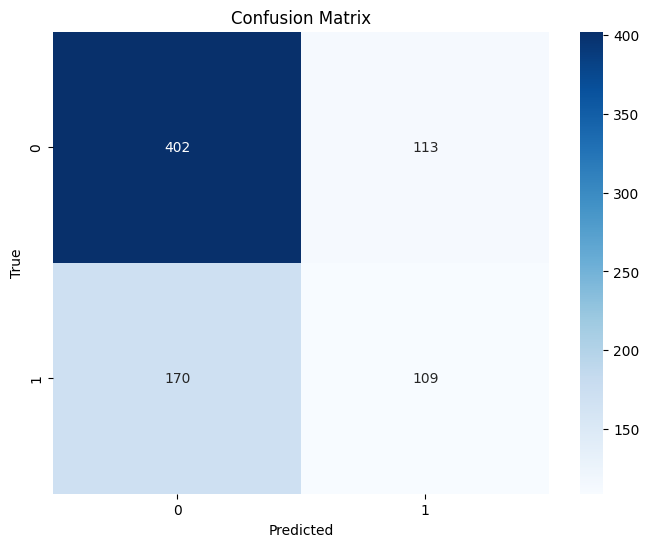

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
yprob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yprob)
roc_auc = auc(fpr, tpr)

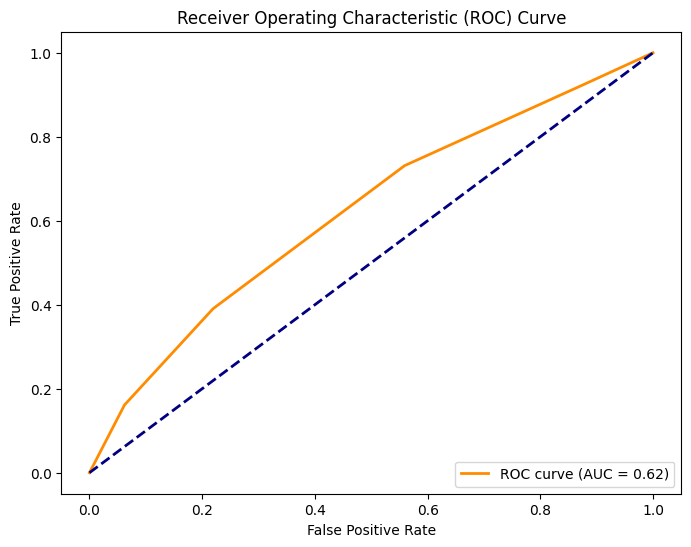

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

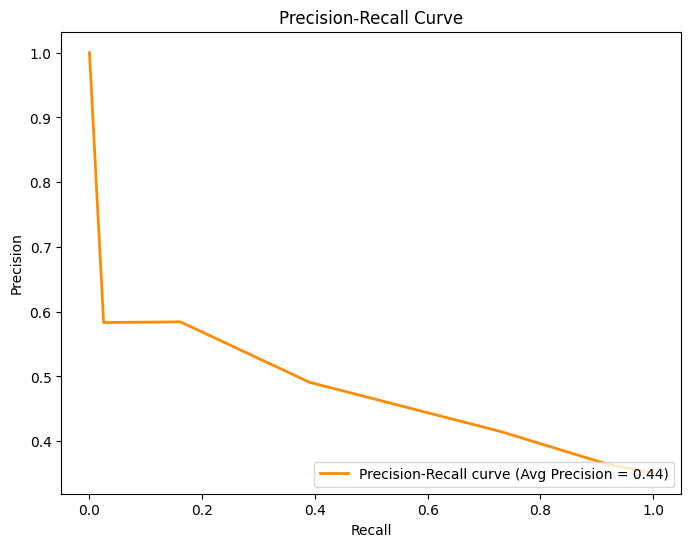

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds_pr = precision_recall_curve(y_test, yprob)
average_precision = average_precision_score(y_test, yprob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (Avg Precision = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()


## Naive Bayes Classifier

In [ ]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Naive Bayes Accuracy: {accuracy*100}%")

Naive Bayes Accuracy: 64.6095717884131%


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test.values, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("fscore", fscore)

Precision: [0.65641711 0.47826087]
Recall: [0.95339806 0.07885305]
fscore [0.77751386 0.13538462]


In [ ]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[491  24]
 [257  22]]


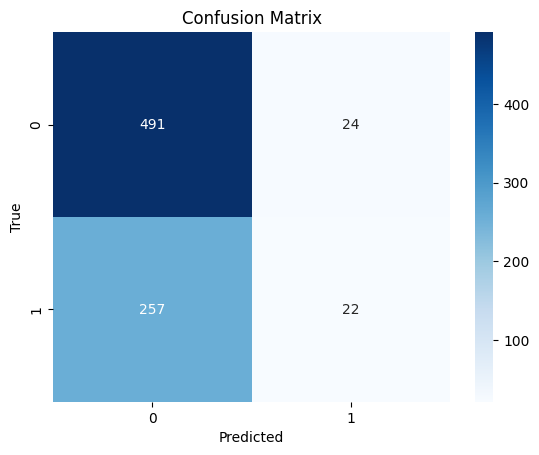

In [ ]:
classes = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

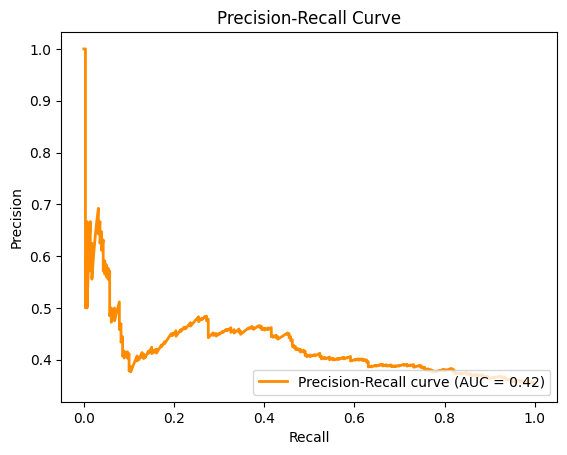

In [ ]:
y_prob = naive_bayes_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
precision_auc = auc(recall, precision)

plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC = {precision_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

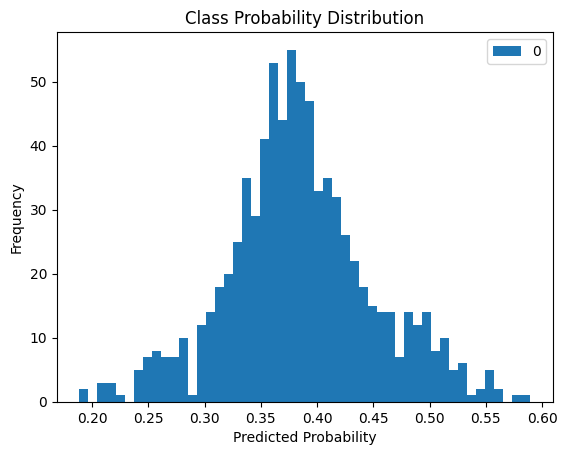

In [ ]:
plt.hist(y_prob, bins=50, label=classes)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Class Probability Distribution')
plt.legend()
plt.show()

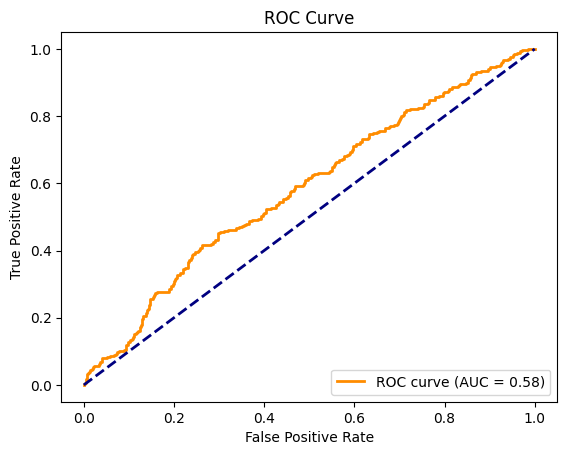

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Support Vector Machine

In [46]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", svm_accuracy*100, "%")

SVM Accuracy: 71.41057934508817 %


In [47]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test.values, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("fscore", fscore)

Precision: [0.71052632 0.73636364]
Recall: [0.94368932 0.29032258]
fscore [0.81067556 0.41645244]


In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[486,  29],
       [198,  81]])

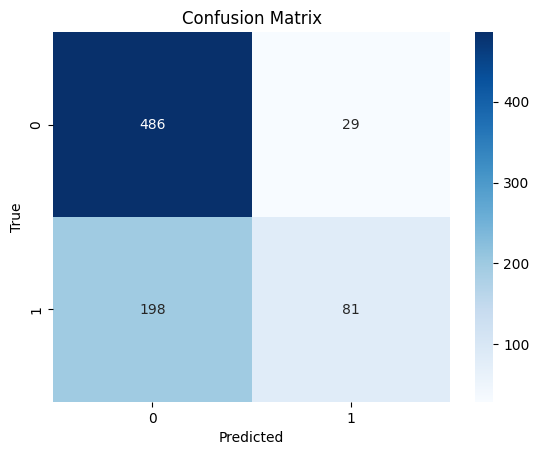

In [49]:
classes = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

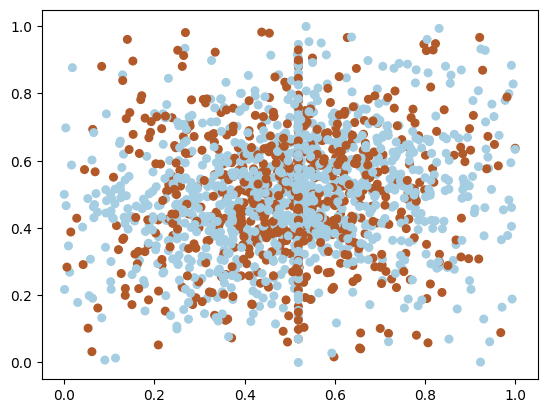

In [50]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.show()

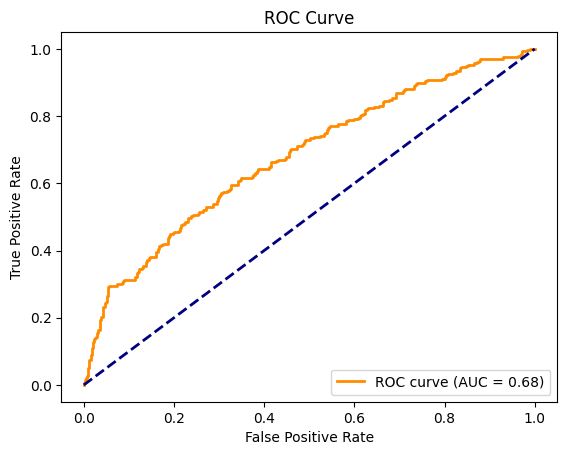

In [52]:
y_prob = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Gradient Boost Classification

In [59]:
gbm = GradientBoostingClassifier(n_estimators=100)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
y_prob = gbm.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_prob)
loss = log_loss(y_test, y_prob)
print(f"Accuracy of the GBM model: {accuracy * 100:.4f}%")

Accuracy of the GBM model: 65.4912%


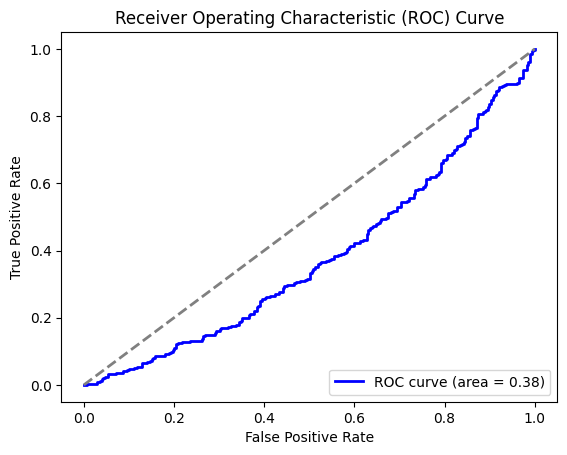

In [60]:
Y_test_prob = gbm.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, Y_test_prob, pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[466,  49],
       [225,  54]])

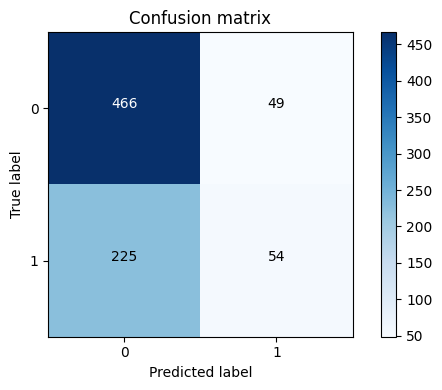

In [62]:
target = np.unique(y_test)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(len(target))
plt.xticks(ticks, target)
plt.yticks(ticks, target)

threshold = cm.max() / 2.
for i, j in ((i, j) for i in range(cm.shape[0]) for j in range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## Random Forest Classification

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [73]:
print("Random Forest Accuracy:", rf_accuracy * 100, "%")

Random Forest Accuracy: 66.87657430730478 %


In [74]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test.values, rf_pred)

print("Precision:", precision)
print("Recall:", recall)
print("fscore", fscore)

Precision: [0.69384615 0.55555556]
Recall: [0.87572816 0.28673835]
fscore [0.77424893 0.37825059]


In [75]:
cm = confusion_matrix(y_test, rf_pred)
cm

array([[451,  64],
       [199,  80]])

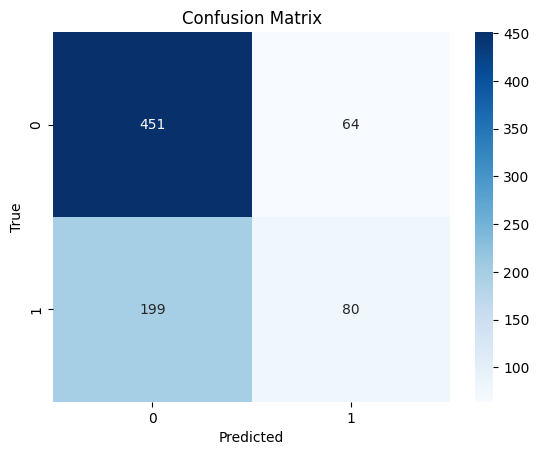

In [76]:
classes = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [88]:
from sklearn.metrics import roc_curve, auc
yprob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yprob)
roc_auc = auc(fpr, tpr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


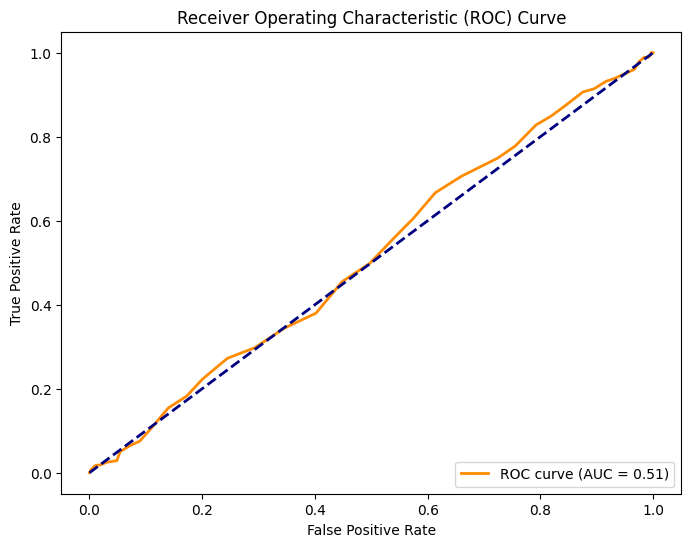

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Comparison of different models

In [90]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [91]:
models = {
    'LR': LogisticRegression(),
    'NB': GaussianNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'RForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GB': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

model_names = []
model_accu = []
for name, mdl in models.items():
    mdl.fit(X_train,y_train)
    y_pred = mdl.predict(X_test)
    accu = accuracy_score(y_test,y_pred)
    model_names.append(name)
    model_accu.append(accu*100)
    print(f"{name}  with accuracy : {accu*100}")

LR  with accuracy : 64.86146095717883
NB  with accuracy : 64.6095717884131
SVM  with accuracy : 71.41057934508817
KNN  with accuracy : 63.97984886649874
Decision Tree  with accuracy : 57.556675062972296
RForest  with accuracy : 67.12846347607054
AdaBoost  with accuracy : 62.72040302267003
GB  with accuracy : 65.36523929471034
Extra Trees  with accuracy : 58.43828715365239


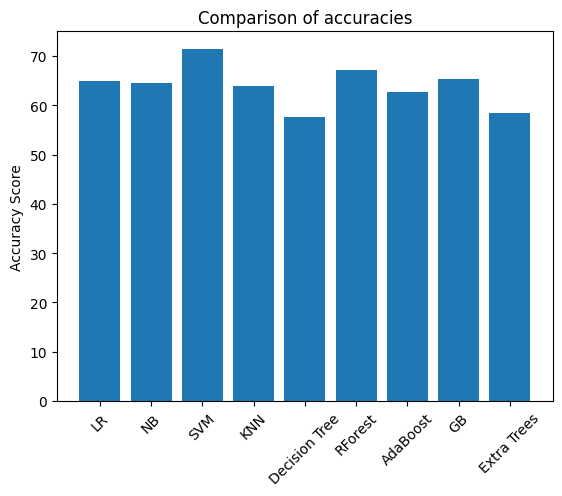

In [92]:
import matplotlib.pyplot as plt
plt.bar(model_names, model_accu)
plt.title('Comparison of accuracies')
plt.ylabel('Accuracy Score')
plt.xticks(model_names)
plt.xticks(rotation=45)
plt.show()